In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm

In [2]:
#import dataset
data = pd.read_csv('C:\\Users\\Lenovo\\.spyder-py3\\winequality-white.csv')
X = data.iloc[:,0:-1]
Y = data.iloc[:,11]

In [4]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [8]:
data.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

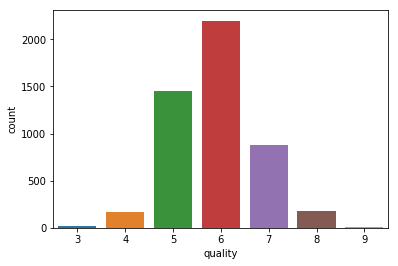

In [9]:
sns.countplot(x='quality',data=data)

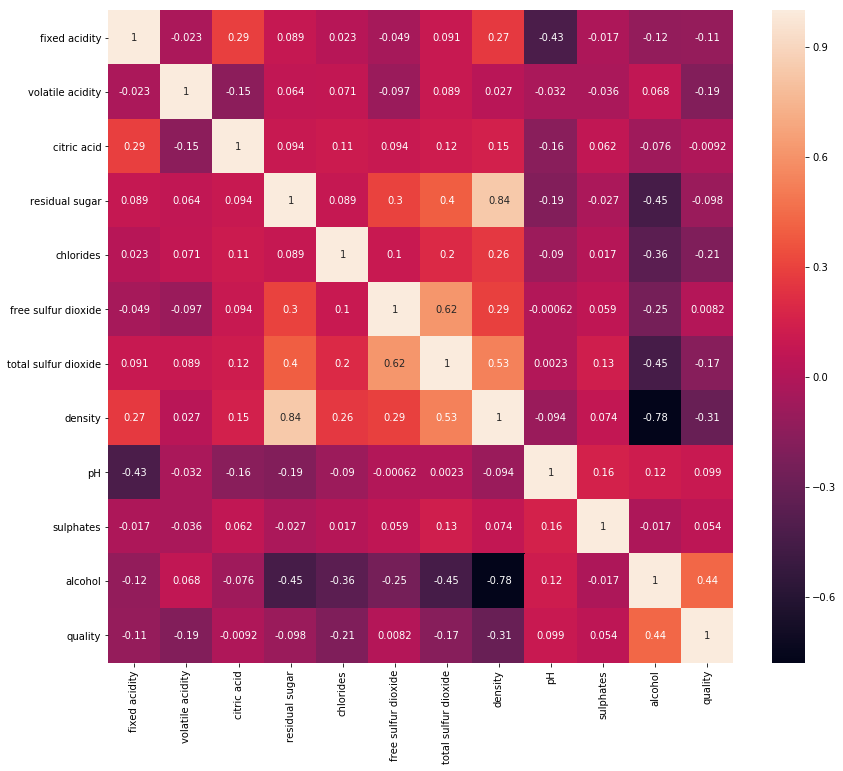

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),annot=True)

In [11]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

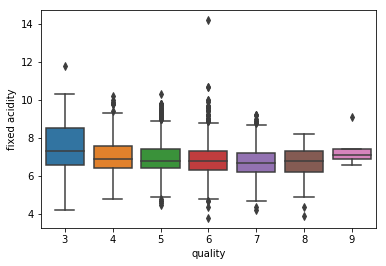

In [12]:
sns.boxplot('quality','fixed acidity', data=data)

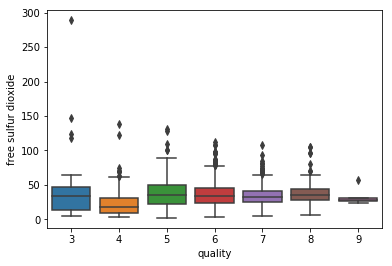

In [13]:
sns.boxplot('quality','free sulfur dioxide', data=data)

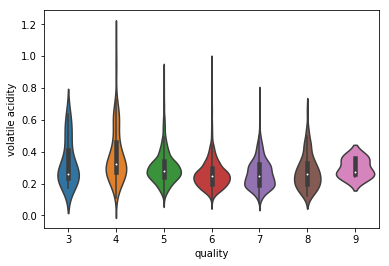

In [14]:
sns.violinplot('quality','volatile acidity', data=data)

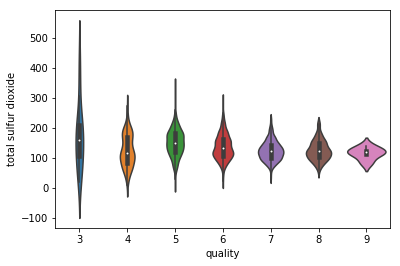

In [15]:
sns.violinplot('quality','total sulfur dioxide', data=data)

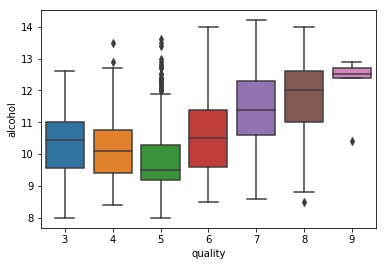

In [16]:
sns.boxplot('quality','alcohol', data=data)

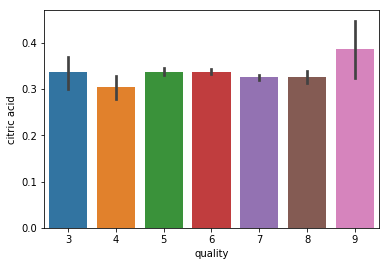

In [17]:
sns.barplot('quality','citric acid', data=data)

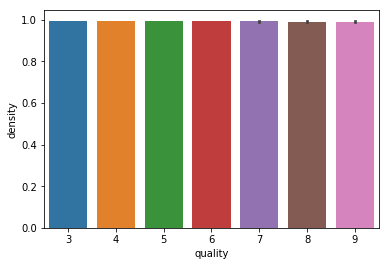

In [18]:
sns.barplot('quality','density', data=data)

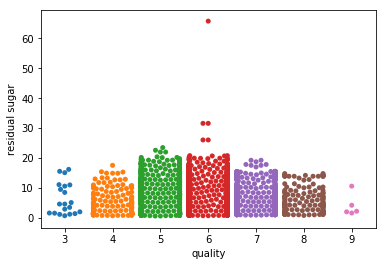

In [19]:
sns.swarmplot('quality','residual sugar', data=data)

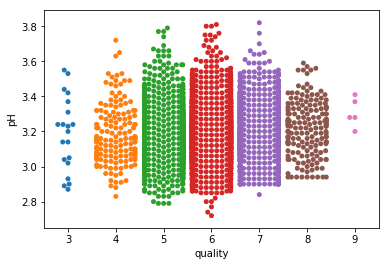

In [20]:
sns.swarmplot('quality','pH', data=data)

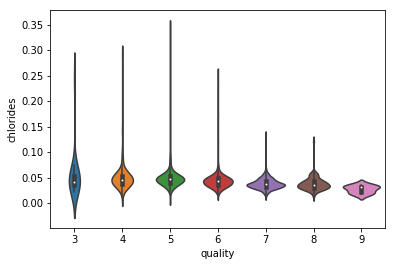

In [21]:
sns.violinplot('quality','chlorides', data=data)

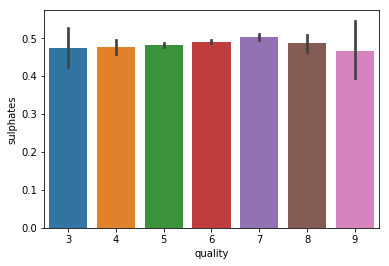

In [22]:
sns.barplot('quality','sulphates', data=data)

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


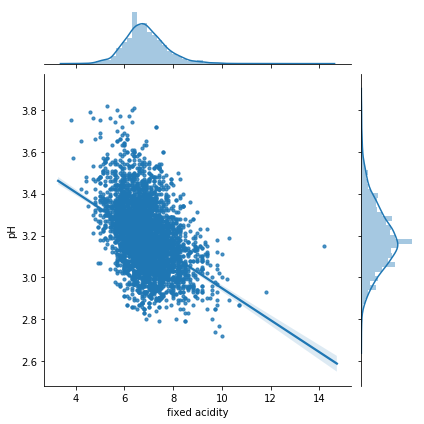

In [23]:
grid1=sns.JointGrid(x="fixed acidity", y="pH", data=data, size=6)
grid1=grid1.plot_joint(sns.regplot, scatter_kws={"s": 10})
grid1=grid1.plot_marginals(sns.distplot)

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


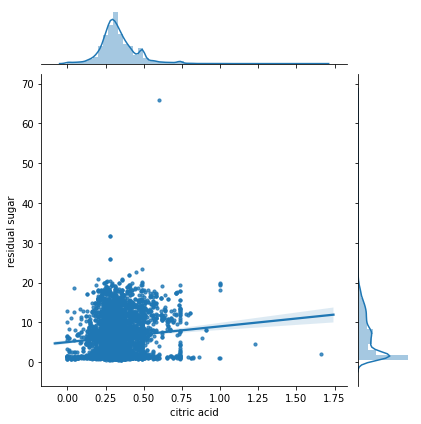

In [24]:
grid1=sns.JointGrid(x="citric acid", y="residual sugar", data=data, size=6)
grid1=grid1.plot_joint(sns.regplot, scatter_kws={"s": 10})
grid1=grid1.plot_marginals(sns.distplot)

# REGRESSION 

# LINEAR REGRESSION

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state=24, stratify=Y)

In [26]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_test)
print (Y_pred,Y_test)

[5.57652703 6.11958671 5.28388808 6.11107265 5.48884444 5.38058469
 5.25997029 4.68356515 6.29078092 5.51447282 6.70415039 5.46528733
 6.30982473 4.62670357 6.32160597 5.75909581 6.70740707 6.22629264
 6.82145679 5.06755243 6.01292699 6.47840096 6.60410269 6.02409905
 5.18731836 5.61464463 5.58514894 5.89919036 6.37735316 5.73762147
 5.54534098 5.89397434 5.57133655 6.07790032 5.62337632 5.31143307
 5.15791575 6.60715147 5.80679105 6.25324656 6.098331   6.44771703
 5.56570009 5.9373596  6.14345155 5.81741258 3.85568397 5.89417135
 6.69946192 6.39650959 6.1727791  6.65969751 5.92731884 6.73297452
 6.26012128 6.08482589 6.78619636 5.15573923 6.79509935 5.52650113
 5.99542026 5.86387639 6.6224545  5.51893041 6.52668855 5.5523966
 5.83837176 6.19887797 6.63750877 6.09668324 5.84742849 5.91888945
 5.52436981 5.54177028 5.85211015 5.91434904 5.50753779 6.06158196
 6.58273906 5.71360516 5.14102703 5.48309122 5.81846956 5.99511543
 5.53755113 5.79840357 5.85559998 5.81921129 5.98877511 5.57525

train_pred = LR.predict(X_train)
print(train_pred)

In [27]:
test_pred = LR.predict(X_test) 

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

train_rmse = mean_squared_error(train_pred, Y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, Y_test) ** 0.5
print(test_rmse)

In [29]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, test_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, test_pred)))
print('R-Square: ',r2_score(Y_test, Y_pred))
print('Intercept: ',LR.intercept_ )
print('Coefficients: ',LR.coef_ )

Mean Absolute Error: 0.5917594804437557
Mean Squared Error: 0.5838322667621332
Root Mean Squared Error: 0.7640891746138884
R-Square:  0.25627054727510523
Intercept:  141.72525175817438
Coefficients:  [ 5.43988106e-02 -1.92286593e+00  1.19871605e-02  7.90863214e-02
 -2.56959953e-01  3.38289756e-03 -3.37872254e-04 -1.41904663e+02
  7.30171721e-01  6.41733903e-01  2.04974163e-01]


FEATURE SELECTION By BACKWARD ELIMINATION

In [30]:
X_ols=X
X_ols= sm.add_constant(X_ols)
anova = sm.OLS(Y, X_ols).fit()
anova.summary()

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:04:44   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_opt = X_ols
result = sm.OLS (Y,X_opt).fit()
result.params 

const                   150.192842
fixed acidity             0.065520
volatile acidity         -1.863177
citric acid               0.022090
residual sugar            0.081483
chlorides                -0.247277
free sulfur dioxide       0.003733
total sulfur dioxide     -0.000286
density                -150.284181
pH                        0.686344
sulphates                 0.631476
alcohol                   0.193476
dtype: float64

In [32]:
result.pvalues

const                   1.707781e-15
fixed acidity           1.706038e-03
volatile acidity        1.058005e-58
citric acid             8.175888e-01
residual sugar          5.298587e-27
chlorides               6.509735e-01
free sulfur dioxide     9.994821e-06
total sulfur dioxide    4.497912e-01
density                 4.044493e-15
pH                      8.102311e-11
sulphates               3.440472e-10
alcohol                 1.699500e-15
dtype: float64

In [33]:
cols=list(X.columns)
temp = 1
while (len(cols)>0):
    p= []
    X_ols = X[cols]
    X_ols = sm.add_constant(X_ols)
    result = sm.OLS(Y,X_ols).fit()
    p = pd.Series(result.pvalues.values[1:],index = cols)      
    temp = max(p)
    feature_with_p_max = p.idxmax()
    if(temp>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:04:45   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 154.1062     18.100      8.514      0.000     118.622     189.591
fixed acidity           0.0681      0.020      3.333      0.001       0.028       0.108
volatile acidity       -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residual sugar          0.0828      0.007     11.370      0.000       0.069       0.097
free sulfur dioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density              -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                      0.6942      0.103      6.717      0.000       0.492       0.897
sulphates               0.6285      0.100      6.287      0.000       0.433       0.824
alcohol                 0.1932      0.024      8.021      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
features=X[cols]

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size = 1/5, random_state=24, stratify=Y)
LR_new = LinearRegression()
LR_new.fit(X_train,Y_train)
Y_pred_new=LR_new.predict(X_test)
print (Y_pred_new,Y_test)

[5.58466496 6.10143554 5.28763648 6.10752923 5.47659233 5.37324794
 5.25105772 4.66573982 6.28225868 5.52158692 6.69798933 5.47265015
 6.30439013 4.60070692 6.31144148 5.74667765 6.69271291 6.21051146
 6.81820883 5.07020073 6.02286378 6.47549897 6.59935524 6.0514098
 5.19314802 5.62203757 5.57574318 5.89642967 6.37066136 5.72911666
 5.54970243 5.89873815 5.57137834 6.06815027 5.63694177 5.30474492
 5.17535632 6.61593923 5.81028927 6.28063455 6.1012686  6.44321708
 5.56398211 5.94087003 6.16099033 5.79913546 3.84313247 5.89479832
 6.70753756 6.40834559 6.16614208 6.64983062 5.94306547 6.73397813
 6.25531477 6.0713665  6.77278618 5.14834486 6.78429327 5.5288892
 5.97846852 5.85880759 6.62160133 5.52299492 6.52270445 5.55521764
 5.81691707 6.19228145 6.6307294  6.08920375 5.844874   5.93069989
 5.52239043 5.52539721 5.85554508 5.90701832 5.51888552 6.07531085
 6.57607642 5.70788286 5.15246056 5.48353016 5.83048435 5.99674213
 5.54083968 5.79746322 5.85823904 5.82753375 5.98724774 5.574962

In [36]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_new))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_new))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_new)))
print('R-Square: ',r2_score(Y_test, Y_pred_new))
print('Intercept: ',LR.intercept_ )
print('Coefficients: ',LR.coef_ )

Mean Absolute Error: 0.5921492563613743
Mean Squared Error: 0.583808312217955
Root Mean Squared Error: 0.7640734992250124
R-Square:  0.25630106237515393
Intercept:  141.72525175817438
Coefficients:  [ 5.43988106e-02 -1.92286593e+00  1.19871605e-02  7.90863214e-02
 -2.56959953e-01  3.38289756e-03 -3.37872254e-04 -1.41904663e+02
  7.30171721e-01  6.41733903e-01  2.04974163e-01]


# SVR

In [37]:
from sklearn.svm import SVR
svr1= SVR(kernel='rbf')
svr1.fit(X_train,Y_train)
svr1_pred=svr1.predict(X_test)
print (svr1_pred)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[6.01602034 5.57042576 5.40766168 5.39829621 5.58479064 5.92696233
 5.36983617 5.63594027 6.16952049 5.05612288 5.71148513 5.46807253
 6.14914282 5.26967375 6.01783435 6.09324384 6.45285333 6.22689292
 7.02093232 5.59674189 5.9860634  6.0489393  6.73356939 5.98947308
 5.44488678 5.98818694 6.90050023 6.32823244 6.27593828 5.80117169
 5.16913911 5.668669   6.17305828 6.21591758 5.18077414 5.56538173
 5.26148399 6.87073481 5.90473908 6.79533236 6.29191394 6.25176886
 5.0995631  5.62099406 5.13588292 5.93224408 4.94009455 5.89989656
 6.64971596 6.49073853 6.07333517 5.52860575 5.69818683 5.99995693
 6.6572001  5.69831334 5.80173349 4.97388431 6.32267306 5.19412795
 5.63166499 5.84480871 6.20184135 5.63114628 6.26337737 5.97807695
 6.1123472  6.07515238 6.80684139 5.94176901 5.25469424 5.97658408
 5.97859163 5.84485789 5.68347613 5.65893026 5.35587162 6.41819307
 6.26423414 5.54456505 5.81438844 5.60321662 6.19245245 6.04078562
 5.60058493 5.84409879 6.00122864 6.07657873 6.44636325 5.7234

In [38]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, svr1_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, svr1_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, svr1_pred)))
print('R-Square: ',r2_score(Y_test, svr1_pred))
print('Intercept: ',svr1.intercept_ )
#print('Coefficients: ',svr1.coef_ )

Mean Absolute Error: 0.5655227924669021
Mean Squared Error: 0.5652718072866112
Root Mean Squared Error: 0.7518456006964537
R-Square:  0.2799142565284627
Intercept:  [5.75859302]


In [39]:
from sklearn.svm import SVR
svr1= SVR(kernel='linear')
svr1.fit(X_train,Y_train)
svr1_pred=svr1.predict(X_test)
print (svr1_pred)

[5.5385583  6.14626485 5.20096908 5.9675315  5.48151002 5.32661538
 5.18718696 4.55845828 6.4253169  5.35802434 6.54099058 5.47499538
 6.34798713 4.61719981 6.21688807 5.98190839 6.6424023  6.09160383
 6.73494448 4.98449687 5.92245207 6.41100944 6.4977736  6.03775277
 5.19001937 5.56424736 5.52469729 5.66295508 6.28993246 5.65407954
 5.54831905 5.91458502 5.6311845  6.00409629 5.59925404 5.22737479
 5.15661696 6.56416587 5.74168173 6.34902717 6.04175558 6.3582971
 5.6354354  5.93127796 6.08591613 5.97581165 3.99511387 5.81193493
 6.64441641 6.34494967 6.01132827 6.4752331  5.86510741 6.6751145
 6.18858166 5.96540292 6.70207736 5.23616313 6.69084337 5.43886229
 6.03645587 5.81165331 6.5347606  5.35649643 6.47612157 5.42968057
 5.91217236 6.12061499 6.5347753  5.84187136 5.81475034 5.85287235
 5.43049424 5.47652566 5.79926349 5.90454678 5.48630686 5.97281974
 6.55796401 5.61064015 5.1413118  5.50839186 5.76212113 5.92813769
 5.43833534 5.77803992 5.80063082 5.80642011 5.87901883 5.577774

In [40]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, svr1_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, svr1_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, svr1_pred)))
print('R-Square: ',r2_score(Y_test, svr1_pred))
print('Intercept: ',svr1.intercept_ )
print('Coefficients: ',svr1.coef_ )

Mean Absolute Error: 0.5988930253693481
Mean Squared Error: 0.5981569384015695
Root Mean Squared Error: 0.7734060630752577
R-Square:  0.23802270315037766
Intercept:  [1.2940934]
Coefficients:  [[-0.05096979 -2.08631379  0.02543601  0.00366978 -0.22510815  0.39641576
   0.4386685   0.37335412]]


USING PCA

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_X_train= sc.fit_transform(X_train)
sc_X_test= sc.transform(X_test)


In [42]:
from sklearn.decomposition import PCA
pca=PCA(.95)
pca_X_train = pca.fit_transform(sc_X_train)
pca_X_test = pca.transform(sc_X_test)
df=pd.DataFrame(pca.components_)

In [43]:
print('Principal :', pca.components_)
print('Amount of Variance: ', pca.explained_variance_)
print('Percentage of Varince: ', pca.explained_variance_ratio_)
print('Singular values: ', pca.singular_values_)
print('Estimated No. of Components: ', pca.n_components_)
#print (pd.DataFrame(pca.n_components_))

Principal : [[ 0.19933754 -0.01080888  0.51698018  0.26268506  0.58952489 -0.18376761
   0.01786566 -0.49218539]
 [-0.58664165 -0.10484763  0.06437923  0.33053157  0.09058607  0.63570704
   0.32775436 -0.10821531]
 [-0.31011637  0.82879374  0.22700214 -0.15747117  0.07515088  0.08949439
  -0.3521138   0.05441143]
 [ 0.27772809  0.39060101 -0.0463973  -0.29839934  0.0991666   0.05000872
   0.81615605  0.02564177]
 [ 0.02101885  0.27971988 -0.01582795  0.79082532 -0.21070793 -0.3592361
   0.18552023  0.29629989]
 [ 0.60533777  0.19378924 -0.31500665  0.28287041  0.07223226  0.58317129
  -0.25523222 -0.07948151]
 [ 0.21204201 -0.18157612  0.57716156 -0.04858034  0.11544974  0.249059
  -0.0219481   0.71466918]]
Amount of Variance:  [2.63036694 1.41963915 1.06897086 0.97571547 0.80642461 0.55860193
 0.51902844]
Percentage of Varince:  [0.32871195 0.1774096  0.13358725 0.1219333  0.10077735 0.06980742
 0.064862  ]
Singular values:  [101.50442019  74.57027918  64.70825961  61.82133514  56.202

In [44]:
from sklearn.decomposition import PCA
pca=PCA(.90)
pca_X_train = pca.fit_transform(sc_X_train)
pca_X_test = pca.transform(sc_X_test)

print('Principal :', pca.components_)
print('Amount of Variance: ', pca.explained_variance_)
print('Percentage of Varince: ', pca.explained_variance_ratio_)
print('Singular values: ', pca.singular_values_)
print('Estimated No. of Components: ', pca.n_components_)

Principal : [[ 0.19933754 -0.01080888  0.51698018  0.26268506  0.58952489 -0.18376761
   0.01786566 -0.49218539]
 [-0.58664165 -0.10484763  0.06437923  0.33053157  0.09058607  0.63570704
   0.32775436 -0.10821531]
 [-0.31011637  0.82879374  0.22700214 -0.15747117  0.07515088  0.08949439
  -0.3521138   0.05441143]
 [ 0.27772809  0.39060101 -0.0463973  -0.29839934  0.0991666   0.05000872
   0.81615605  0.02564177]
 [ 0.02101885  0.27971988 -0.01582795  0.79082532 -0.21070793 -0.3592361
   0.18552023  0.29629989]
 [ 0.60533777  0.19378924 -0.31500665  0.28287041  0.07223226  0.58317129
  -0.25523222 -0.07948151]]
Amount of Variance:  [2.63036694 1.41963915 1.06897086 0.97571547 0.80642461 0.55860193]
Percentage of Varince:  [0.32871195 0.1774096  0.13358725 0.1219333  0.10077735 0.06980742]
Singular values:  [101.50442019  74.57027918  64.70825961  61.82133514  56.20289323
  46.77653016]
Estimated No. of Components:  6


In [45]:
from sklearn.svm import SVR
svr2= SVR(kernel='rbf')
svr2.fit(pca_X_train,Y_train)
svr2_pred=svr2.predict(pca_X_test)
print (svr2_pred)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[5.73143929 5.83353831 5.11074853 5.76128388 5.92062537 5.79835447
 4.97537895 5.96127779 6.06283604 5.13892578 5.9464934  6.35295853
 6.02653097 4.85234593 6.10132612 5.85074418 6.03836579 6.4245234
 6.69944582 4.88972486 6.04376708 6.78259422 6.63266465 5.88738152
 5.57875194 5.13004719 5.92997138 6.57389793 6.7037067  6.08296944
 5.88709931 5.19780069 5.65841707 6.0689618  5.74588899 4.74210033
 5.09212551 6.91351438 5.07507252 6.61976061 6.45277575 6.23710903
 5.57936733 5.21109757 5.36012423 5.62659471 4.27695183 5.87539093
 6.31585083 6.58753334 6.15313207 5.69397878 5.87853363 5.56220287
 6.11726855 5.95067106 7.32853023 5.10032358 6.47287957 5.92677847
 5.82318921 6.25234403 6.41496741 4.922433   6.90011139 5.33339152
 5.94476332 6.14097922 7.06042469 5.9963686  6.80557198 5.72348177
 5.00836734 5.634952   5.71327239 6.10323207 5.31291198 5.72716507
 6.1614892  5.10009488 5.66392432 5.8789108  6.27501416 6.02461954
 5.44496435 5.6274559  5.76828794 5.77001789 6.07554457 5.54077

In [46]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, svr2_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, svr2_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, svr2_pred)))
print('R-Square: ',r2_score(Y_test, svr2_pred))
print('Intercept: ',svr2.intercept_ )
#print('Coefficients: ',svr1.coef_ )

Mean Absolute Error: 0.560127303211865
Mean Squared Error: 0.5612391014592232
Root Mean Squared Error: 0.749158929372949
R-Square:  0.28505142052016397
Intercept:  [5.53133075]


In [47]:
from sklearn.svm import SVR
svr2= SVR(kernel='linear')
svr2.fit(pca_X_train,Y_train)
svr2_pred=svr2.predict(pca_X_test)
print (svr2_pred)

[5.57649187 5.63819726 5.35855772 5.62935692 5.60177974 5.72435187
 5.45968425 5.39170007 6.47136749 5.27807912 5.64387101 6.07365474
 6.43692494 5.31753823 6.30590778 5.74503114 6.3491481  6.07707969
 6.4080911  5.28159242 5.61964955 6.49283228 5.96917184 5.83331027
 5.76014798 5.56392587 5.36509098 5.87620807 6.25134202 5.83078035
 5.88373738 5.34871455 5.72589466 6.17129601 5.30877041 5.34196581
 5.6470665  6.32064758 5.42470622 5.91825043 6.2144482  6.2131376
 5.74645098 5.35503041 5.65723221 5.86330344 4.42959988 5.83164211
 6.45503296 5.86633648 6.33876027 5.79528014 5.94469005 5.76983892
 6.33961917 5.85246641 6.86364154 5.59987378 6.59122457 5.62224732
 6.04711691 6.22211905 6.42645339 5.28360668 6.67156617 5.53325792
 5.88556479 6.14261314 6.25984733 5.56110746 5.47064598 5.65578847
 5.45028427 5.75446836 6.08928218 6.10586441 5.71001666 5.551087
 6.40058834 5.3041426  5.91688355 5.84988274 6.06162089 6.02484449
 5.44662683 5.7652616  5.76221212 5.71294135 5.94831515 5.7441049

In [48]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, svr2_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, svr2_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, svr2_pred)))
print('R-Square: ',r2_score(Y_test, svr2_pred))
print('Intercept: ',svr2.intercept_ )
#print('Coefficients: ',svr1.coef_ )

Mean Absolute Error: 0.6389318896000501
Mean Squared Error: 0.678012476944189
Root Mean Squared Error: 0.8234151303833255
R-Square:  0.1362967120421278
Intercept:  [5.84251968]


# DTR

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr1= DecisionTreeRegressor()
dtr1.fit(X_train,Y_train)
dtr1_pred=dtr1.predict(X_test)

In [50]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, dtr1_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, dtr1_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, dtr1_pred)))
print('R-Square: ',r2_score(Y_test, dtr1_pred))
#('Intercept: ',dtr1.intercept_ )

Mean Absolute Error: 0.47244897959183674
Mean Squared Error: 0.6357142857142857
Root Mean Squared Error: 0.7973169292786186
R-Square:  0.1901793293718167


In [51]:
np.unique(dtr1_pred,return_counts=True)

(array([3., 4., 5., 6., 7., 8.]),
 array([  1,  40, 291, 434, 179,  35], dtype=int64))

# RF

# CLASSIFICATION

# LOGISTIC REGRESSION


In [52]:
from sklearn.linear_model import LogisticRegression
logr1=LogisticRegression(solver='lbfgs', multi_class='multinomial')
logr1.fit(X_train,Y_train)
logr1_pred=logr1.predict(X_test)
print(logr1_pred)

[6 6 5 6 5 6 5 5 6 6 6 6 6 5 6 5 6 6 7 5 6 6 6 6 6 6 5 6 7 6 5 6 6 6 5 6 5
 7 6 6 6 6 6 6 6 6 5 6 7 7 6 6 6 6 6 6 7 5 7 5 6 6 6 6 6 5 6 6 7 6 6 6 6 5
 6 6 6 6 6 5 5 6 6 6 5 6 6 6 6 6 6 6 6 5 6 6 6 6 6 5 6 5 6 6 6 6 6 5 5 5 6
 7 6 6 6 5 6 6 5 6 6 5 6 6 5 5 6 6 6 6 5 6 6 6 6 6 7 6 7 6 6 5 5 6 6 6 6 6
 6 5 7 6 6 7 5 6 6 5 6 6 5 5 6 7 6 5 5 5 5 7 5 5 5 6 5 6 6 6 6 6 6 6 6 6 5
 5 6 5 7 5 6 5 6 6 6 6 6 6 5 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 5 5 7 6 5 5 6 6
 6 5 5 6 6 6 6 5 6 6 6 6 6 5 6 6 6 5 7 6 6 7 6 5 7 5 7 6 6 6 6 5 6 5 6 7 6
 6 6 6 6 5 6 5 6 6 6 6 6 5 5 6 6 5 6 7 6 6 5 6 5 5 5 5 6 6 5 6 7 6 7 6 6 5
 7 6 6 6 6 6 6 6 6 5 6 6 5 6 6 6 6 7 6 6 5 5 6 5 6 5 6 6 7 6 6 6 6 6 6 6 6
 6 6 6 6 5 6 5 6 6 6 6 5 6 6 5 6 6 6 6 6 6 6 6 5 6 6 6 6 7 6 6 6 5 6 6 6 5
 5 5 5 6 6 6 6 6 6 6 6 5 6 6 5 5 6 6 5 6 6 5 5 5 6 6 6 5 6 5 6 6 6 5 5 6 6
 6 5 6 6 6 7 6 5 5 6 6 6 5 6 6 5 5 5 6 5 6 6 6 6 6 5 6 6 6 6 6 7 6 6 6 6 6
 6 6 6 6 6 5 6 7 6 7 6 6 6 6 6 5 5 6 5 5 6 6 5 6 6 5 6 6 6 6 6 6 6 6 6 5 6
 5 6 6 6 6 6 5 5 6 6 6 6 

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [53]:
np.unique(logr1_pred,return_counts=True)

(array([5, 6, 7], dtype=int64), array([262, 651,  67], dtype=int64))

In [54]:
from sklearn.linear_model import LogisticRegression
logr2=LogisticRegression()
logr2.fit(X_train,Y_train)
logr2_pred=logr2.predict(X_test)
print(logr2_pred)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[6 6 5 6 5 5 5 5 6 5 6 5 6 5 6 6 6 6 7 5 6 6 6 6 5 6 5 6 7 6 6 6 6 6 6 5 5
 6 6 6 6 6 5 6 6 6 5 6 7 7 6 6 6 6 6 6 6 5 6 5 6 6 6 5 6 5 6 6 6 6 6 6 5 6
 6 6 5 6 6 6 5 5 6 6 5 6 6 6 6 6 6 7 6 5 6 6 6 6 6 5 6 5 6 6 6 6 6 5 5 5 6
 7 6 6 6 5 6 6 5 6 6 5 6 6 6 5 6 5 6 5 5 6 6 6 6 6 6 6 7 6 6 5 5 6 6 6 6 6
 6 6 7 6 6 6 5 6 6 5 6 6 5 6 6 7 5 5 5 6 5 6 5 5 5 6 5 6 6 6 6 6 5 6 6 5 6
 5 6 5 7 5 6 5 6 6 6 6 5 6 5 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 5 5 6 6 5 5 6 6
 6 5 5 6 6 6 6 5 6 6 5 6 5 5 6 6 6 6 6 6 6 6 6 5 7 5 6 6 6 6 6 5 6 6 5 7 6
 6 6 6 5 5 6 6 6 6 6 5 5 5 5 6 6 5 6 6 6 6 5 6 6 6 5 6 6 5 5 6 7 6 7 6 6 6
 6 6 5 5 6 5 6 6 6 5 6 6 5 6 5 6 5 7 6 6 5 5 6 5 6 5 6 6 6 6 6 6 6 6 6 5 6
 6 5 6 6 5 5 6 5 6 6 6 5 6 6 5 6 6 6 6 6 6 6 6 5 6 6 5 6 6 5 6 6 5 6 6 6 5
 5 5 5 6 6 6 5 6 6 6 6 5 6 6 5 5 5 5 6 6 6 6 6 5 6 6 6 5 6 5 6 5 6 5 5 6 6
 6 5 6 7 6 6 6 5 6 6 6 6 6 6 6 6 5 6 6 6 6 6 5 6 6 6 6 6 6 6 6 7 6 6 6 6 6
 6 6 6 6 6 6 6 7 5 6 6 6 6 6 6 5 6 6 5 5 6 6 6 6 6 6 6 6 6 6 5 6 6 6 5 5 6
 5 7 6 6 6 6 5 5 6 6 6 6 

In [55]:
np.unique(logr2_pred,return_counts=True)

(array([5, 6, 7], dtype=int64), array([272, 679,  29], dtype=int64))

In [56]:
logr2_prob=logr2.predict_proba(X_test)[:,1]
logr2_prob

array([1.41601769e-02, 3.59202545e-02, 6.70178620e-02, 4.35874410e-02,
       3.60873147e-02, 1.02727412e-01, 1.12624483e-02, 1.44519444e-01,
       1.75648796e-03, 2.50638736e-02, 2.06754821e-02, 3.13464642e-02,
       2.83353993e-03, 1.73113372e-01, 1.80088101e-02, 2.05948739e-02,
       3.41846048e-03, 2.14845505e-02, 3.93687718e-03, 9.08687308e-02,
       3.53491725e-02, 3.60851519e-03, 9.13559805e-03, 1.29635198e-02,
       8.92916368e-02, 1.14158004e-02, 1.57719521e-02, 5.10491490e-02,
       2.50203849e-02, 5.78165267e-02, 7.77626592e-03, 7.83270532e-03,
       4.22831428e-02, 1.94892991e-02, 1.11816748e-02, 1.11242053e-01,
       2.95801127e-02, 5.20852011e-03, 3.12466066e-02, 2.93611697e-02,
       2.53742879e-02, 1.43799441e-02, 1.15795477e-02, 6.75091448e-03,
       3.48956448e-03, 3.94268571e-03, 3.48763433e-01, 1.55656877e-03,
       5.77558913e-03, 3.38282226e-02, 1.30987268e-02, 2.75792301e-02,
       1.90426210e-02, 5.42994655e-03, 3.31516936e-03, 8.53899868e-03,
      

In [64]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"): 
    lb = LabelBinarizer() 
    lb.fit(y_test) 
    y_test = lb.transform(y_test) 
    y_pred = lb.transform(y_pred) 
    return roc_auc_score(y_test, y_pred, average=average)

In [65]:
print( 'Confusion Matrix', confusion_matrix (Y_test,logr2_pred ) )
print('Accuracy', accuracy_score(Y_test,logr2_pred ) )
print('Precision (weighted)', precision_score(Y_test,logr2_pred, average='weighted')) 
print('Recall', recall_score(Y_test,logr2_pred,average='weighted' ) )
print('F1', f1_score (Y_test,logr2_pred,average='weighted' ) )
#print('ROC', roc_curve (Y_test,logr2_prob ))
print('AUC', multiclass_roc_auc_score(Y_test,logr2_pred)) 
print('Classification Report', classification_report(Y_test,logr2_pred ))

Confusion Matrix [[  0   0   1   3   0   0   0]
 [  0   0  23   9   1   0   0]
 [  0   0 150 140   1   0   0]
 [  0   0  87 343  10   0   0]
 [  0   0  11 150  15   0   0]
 [  0   0   0  33   2   0   0]
 [  0   0   0   1   0   0   0]]
Accuracy 0.5183673469387755
Precision (weighted) 0.4834494542573517
Recall 0.5183673469387755
F1 0.4597541883259404
AUC 0.5402523766034879
Classification Report               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        33
           5       0.55      0.52      0.53       291
           6       0.51      0.78      0.61       440
           7       0.52      0.09      0.15       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

   micro avg       0.52      0.52      0.52       980
   macro avg       0.22      0.20      0.18       980
weighted avg       0.48      0.52      0.46       980



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undef

For Multi-class problems Classification report and Confusion Matrix are better metrics.
For Imbalance datasets, Accuracy score is not a good metric.

implement svc .

story and removing unimp stuff


implement roc_auc, label binarizer


def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
lb = LabelBinarizer()
    lb.fit(y_test)
y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
return roc_auc_score(y_test, y_pred, average=average)

import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = # ground truth labels
y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

AUC 0.5324488585281429
